# MAPD mod. B - Final assignment

* Professor: Andrea Joachim Peters
* Student: Tommaso Faorlin
* ID: 2021857

In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import requests
import time
requests.packages.urllib3.disable_warnings() 

### Fun exercise

The operation connecting the two numbers is the **XOR**. We used this operation widely during the course to perform error correction (see Reed-Solomon error correction algorithm). A proof for each line follows:
$$1\oplus2=0001\oplus0010=0011=3$$
$$2\oplus5=0010\oplus0101=0111=7$$
$$3\oplus7=0011\oplus0111=0100=4$$
$$4\oplus5=0100\oplus0101=0001={\color{red}1}$$
$$5\oplus9=0101\oplus1001=1100=12$$

## Redundancy

We are programming a file based RAID-4 software algorithm. For this purpose we are converting a single input (raid4.input) file into four data files raid4.0, raid4.1, raid4.2, raid4.3 and one parity file raid4.4 - the four data and one parity file we call ‘stripe files’.

## 1.1 
Q: Write a program (C,C++, R or Python), which produces four striped data and one parity file as described above using the given input file.

A: The files are in the folder.

In [6]:
file = open("raid4.input.pdf", "rb")
data=list(file.read())
data = [data[i:i+4] for i in range(0, len(data), 4)]

#define the output files
r0=open("raid4.0", "wb")
r1=open("raid4.1", "wb")
r2=open("raid4.2", "wb")
r3=open("raid4.3", "wb")
r4=open("raid4.4", "wb")

def fill_missing_bytes(disk, length):
    """
    filling with zeros the missing bytes on a disk
    """
    return np.concatenate([np.array(disk), np.zeros(length-len(disk))])

#defining python lists
raid4_0=[]
raid4_1=[]
raid4_2=[]
raid4_3=[]
raid4_4=[]

for d in data:
    if len(d)%4==0:
        raid4_0.append(d[0])
        raid4_1.append(d[1])
        raid4_2.append(d[2])
        raid4_3.append(d[3])
    elif len(d)==1:
        raid4_0.append(d[0])
    elif len(d)==2:
        raid4_0.append(d[0])
        raid4_1.append(d[1])
    elif len(d)==3:
        raid4_0.append(d[0])
        raid4_1.append(d[1])
        raid4_2.append(d[2])

max_length=max(len(raid4_0),len(raid4_1),len(raid4_2),len(raid4_3))

#pad all disks to max_length adding zeros
raid4_0 = [int(i) for i in fill_missing_bytes(raid4_0, max_length)]
raid4_1 = [int(i) for i in fill_missing_bytes(raid4_1, max_length)]
raid4_2 = [int(i) for i in fill_missing_bytes(raid4_2, max_length)]
raid4_3 = [int(i) for i in fill_missing_bytes(raid4_3, max_length)]

#compute the parity
for i in range(max_length):
    raid4_4.append(raid4_0[i]^raid4_1[i]^raid4_2[i]^raid4_3[i])

r0.write(bytes(raid4_0))
r0.close()
r1.write(bytes(raid4_1))
r1.close()
r2.write(bytes(raid4_2))
r2.close()
r3.write(bytes(raid4_3))
r3.close()
r4.write(bytes(raid4_4))
r4.close()

## 1.2
Q: Extend the program to compute additionally the parity of all bytes within one stripe file. You can say, that the computed column-wise parity acts as a checksum. for each stripe file. Compute the size overhead by comparing the size of all 5 stripe files with the original file. The size overhead is 25%<!

In [7]:
def xor_list(a):
    '''
    compute the xor between all the items of a given list
    '''
    xor_arr = 0
    for i in range(len(a)):
         xor_arr = xor_arr ^ a[i]
    return xor_arr

q0=xor_list(raid4_0)
q1=xor_list(raid4_1)
q2=xor_list(raid4_2)
q3=xor_list(raid4_3)
q4=xor_list(raid4_4)

raid4_0.append(q0)
raid4_1.append(q1)
raid4_2.append(q2)
raid4_3.append(q3)
raid4_4.append(q4)

original_data = [item for sublist in data for item in sublist]
overhead=((len(raid4_0)+len(raid4_1)+len(raid4_2)+len(raid4_3)+len(raid4_4))-len(original_data))/len(original_data)
print('The total overhead is', round(overhead,2)*100, '%')

The total overhead is 25.0 %


## 1.3
Q: What is the 5-byte parity value if you write it it in hexadecimal format like $P^5 =0x[q0][q1][q2][q3][q4]$, where the $[qx]$ are the
hexadecimal parity bytes computed by xor-ing all bytes in each stripe file. A byte in hexadecimal has two digits and you should add leading 0 if necessary.

In [8]:
print('A: the 5-byte parity value is: '+'0x'+\
hex(q0)[2:].zfill(2)+\
hex(q1)[2:].zfill(2)+\
hex(q2)[2:].zfill(2)+\
hex(q3)[2:].zfill(2)+\
hex(q4)[2:].zfill(2))

A: the 5-byte parity value is: 0xa507a09c9e


## 1.4
Q: If you create a sixth stripe file, which contains the row-wise parities of
the five stripe files, what would be the contents of this file? Write down the equation for R, which is the XOR between all data stripes D0,D1,D2,D3 and the parity P. Remember P was the parity of D0,D1,D2,D3! Reduce the equation removing P from it to get the answer about the contents!

A: The file will contain all zeros. Let's start from the equation for *R*:
$$R=(D0\oplus D1\oplus D2\oplus D3)\oplus P=(D0\oplus D1\oplus D2\oplus D3)\oplus(D0\oplus D1\oplus D2\oplus D3)$$
and using the properties of the XOR function (associative and commutative) we end up with the following equation:
$$R=(D0\oplus D0)\oplus(D1\oplus D1)\oplus(D2\oplus D2)\oplus(D3\oplus D3)=0$$
that evaluates to $0$ thanks to the self-inverse property of the XOR itself $D_i\oplus D_i=0\,\,\forall i$.

In a more easier way, I can exploit the self-inverse property of the XOR function noticing that the first three XOR in the first equation of this cell are the definition of $P$, and so: $P\oplus P=0$.

## 1.5

Q: After some time you recompute the 5-byte parity value as in 1.3. Now the result is $P^5 = 0x a5 07 a0 \color{red}{01} 9e$. Something has been corrupted. You want to reconstruct the original file raid4.input using the 5 stripe files. Describe how you can recreate the original data file. Which stripe files do you use and how do you recreate the original data file with the correct size?

A: The checksum of the data disk D3 is different from the one of the original data file, this means that something inside has been corrupted. In order to recreate the original data file I will need to compute the following parity between the other five uncorrupted 'stripe files': $$D3=D0\oplus D1\oplus D2\oplus P$$

## Cryptography

## 2.1

Q: Is this symmetric or asymmetric encryption and explain why?

A: This is symmetric encryption because the same key is used both for encryption and decryption.

## 2.2 

Q: Write a small brute force program which tests keys from $0\dots255$ and use a dictionary approach to figure out the original message. In Python you can use the $ord()$ function to get an integer representation of a character and the $chr()$ to retrieve a character string from an integer!

A: The used key is 246 , the original message text is 'Padova rocks'.

In [11]:
def denonce(message_ascii):
    nonce = np.arange(5,len(message_ascii)+5)
    output = np.subtract(message_ascii, nonce)
    return output 

original_message='K]amua!trgpy'
original_message_ascii=np.zeros(len(original_message))
for i in range(len(original_message)):
    original_message_ascii[i]=ord(original_message[i])
    
message_denonced=denonce(original_message_ascii)

for i in range(256):
    decryption_trial=np.zeros(len(message_denonced))
    for j in range(len(decryption_trial)):
        decryption_trial[j]=(message_denonced[j]-i)%256
    decryption_trial=[chr(int(i)) for i in decryption_trial]
    
    #with this function I have found the correct key for the correct message
    #in order to optimize spaces in the final document I avoid to print out
    #all the possibilities.

    #print('Trying with key: ',i,'Message: ',decryption_trial)
    
    if i==246: print('Trying with key: ',i,'Message: ',decryption_trial)

Trying with key:  246 Message:  ['P', 'a', 'd', 'o', 'v', 'a', ' ', 'r', 'o', 'c', 'k', 's']


## Object Storage

## 3.1
Write a program in Python, R or using ROOT, which simulates the placement of 10GB files to random locations and account the used space on each hard disk. Once the first hard disk is full, you stop to place files.

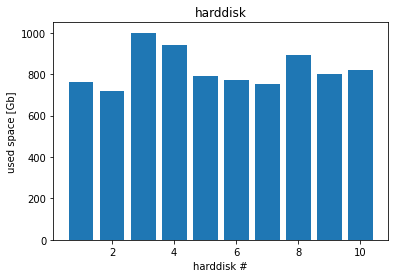

In [2]:
def fill_disks(disk_size, n_disks):
    disks=np.zeros(n_disks)
    while(not any((math.floor(d))==1000 for d in disks)):
        disks[random.randint(0, n_disks-1)]+=disk_size
    return disks

random.seed(331574) #set the seed
disk_size1=10       #Gb

x=np.arange(1,11)
disks1 = fill_disks(disk_size1, 10)
plt.bar(x,disks1)
plt.xlabel('harddisk #')
plt.ylabel('used space [Gb]')
plt.title('harddisk')
plt.show()

## 3.1a 
Q: How many files did you manage to place?

A: With the seed $random.seed(331574)$, and a file size of $10$ GB, I manage to place 824 files.

In [3]:
sum(disks1)/disk_size1

824.0

## 3.1b 
Q: What is the percentage of total used space on all hard disks in the moment the first disk is full?

A: With the seed $random.seed(331574)$, and a file size of $10$ GB, the percentage of total used space is 82.4%

In [4]:
print(round(sum(disks1)/10000*100,2),'%')

82.4 %


## 3.2 
Repeat the same task placing 1GB files until the first hard disk is full.

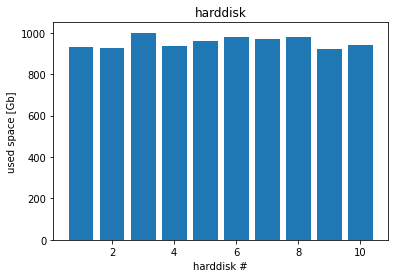

In [5]:
random.seed(331574) #set the seed
disk_size2=1     #Gb

disks2 = fill_disks(disk_size2, 10)
plt.bar(x,disks2)
plt.xlabel('harddisk #')
plt.ylabel('used space [Gb]')
plt.title('harddisk')
plt.show()

## 3.2a 
Q: How many files did you manage to place?

A: With the seed $random.seed(331574)$, and a file size of $1$ GB, I manage to place 9545 files.

In [6]:
sum(disks2)

9545.0

## 3.2b 
Q: What is the percentage of total used space on all hard disks in the moment the first disk is full?

A: With the seed $random.seed(331574)$, and a file size of $1$ GB, the percentage of total used space is 95.45%

In [7]:
print(round(sum(disks2)/10000*100,2),'%')

95.45 %



## 3.3
Q: Based on this observation: why do you think object storage typically stores fixed size blocks of $4$ MB and not files of GBs size as a whole? (so called block storage approach).

A: In a block storage approach, the smaller the block size is, the more the disks fill up as we can observe comparing the performances with a $10$ GB data block and a $4$ MB one. So one typically stores a large file by shattering it into small chunks (data blocks) in order to use the storing space in a more clever way. It is important to find a trade-off between disks fullness and time spent in moving around the chunks of data, because a small block size will result in a lot of chunks to be stored.

Run the same program for $4$ MB block sizes and demonstrate the benefits.

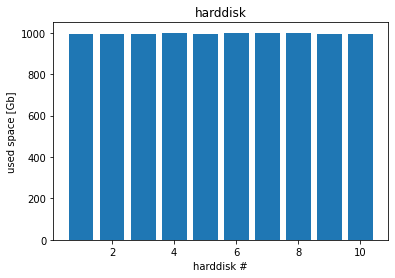

In [8]:
random.seed(331574) #set the seed
disk_size3=0.004     #Gb

disks3 = fill_disks(disk_size3, 10)
plt.bar(x,disks3)
plt.xlabel('harddisk #')
plt.ylabel('used space [Gb]')
plt.title('harddisk')
plt.show()

With the seed $random.seed(331574)$, and a file size of $0.4$ MB, I manage to place 2488902 files.

In [9]:
round(sum(disks3)/disk_size3,2)

2488902.0

With the seed $random.seed(331574)$, and a file size of $0.4$ MB, the percentage of total used space is 99.56%

In [10]:
print(round(sum(disks3)/10000*100,2),'%')

99.56 %


The disks are almost completely full with this block size!

## 3.4.
Q: Compute the average used space on all hard disks and the standard deviation for the average used space for 10 GB and 1GB and 4M files. How is the standard deviation correlated to the block size and why?
If we now repeat such an experiment for many more (thousands) of hard disks, which kind of distribution do you get when you do a histogram of the used space of all hard disks?

In [11]:
#DISCLAIMER: this cell will take slightly less than 2min
#trying with 500 hard disk
ave4 = fill_disks(disk_size1, 500)
ave5 = fill_disks(disk_size2, 500)

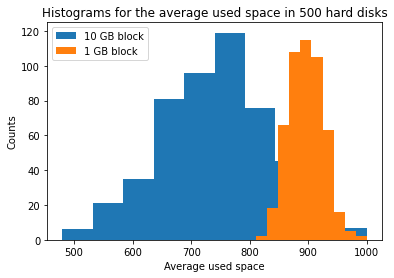

In [14]:
#plots
plt.hist(ave4, label='10 GB block')
plt.hist(ave5, label='1 GB block')

plt.title('Histograms for the average used space in 500 hard disks')
plt.xlabel('Average used space')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [23]:
print('Results for 10 disks')
print('averaged used space with 10 GB data block: ',np.mean(disks1),'/ 1000 GB')
print('averaged used space with 1 GB data block: ', np.mean(disks2),'/ 1000 GB')
print('averaged used space with 4 MB data block: ', round(np.mean(disks3),1),'/ 1000 GB')
print('stddev for average used space with 10 GB data block: ', round(np.std(disks1),2),'GB')
print('stddev for average used space with 1 GB data block: ',  round(np.std(disks2),2),'GB')
print('stddev for average used space with 4 MB data block: ',  round(np.std(disks3),2),'GB')

Results for 10 disks
averaged used space with 10 GB data block:  824.0 / 1000 GB
averaged used space with 1 GB data block:  954.5 / 1000 GB
averaged used space with 4 MB data block:  995.6 / 1000 GB
stddev for average used space with 10 GB data block:  85.93 GB
stddev for average used space with 1 GB data block:  25.32 GB
stddev for average used space with 4 MB data block:  2.06 GB


A: I report here only the results for $10$ GB and $1$ GB block size, since making a histogram for $4$ MB data block would have required too much times. I obtain in the end two **normal distributions**. This is due to the fact that all the disks are filled **randomly** with different size blocks. Thanks to the CLT, I end up with variables normally distributed. In particular, we observe again that a large block sizes correspond to a lower average of used space. Furthermore, the spread of the distribution decreases proportionally to the block size (this is how the standard deviation is correlated with the block size), meaning that the fluctuations of used space are via via smaller (disks are all almost full with smaller block sizes).

## Blockchain

### 4.1.1

Use the REST API and the curl command to transfer coins of the genesis or any other account on your own team account. You can use the -d option to POST a document. You have to indicate in your request, that the content type of the document is JSON. To do this you can add an HTTP header for this command. To carry out this exercise I have used the *requests* Python's module.

In [3]:
ENDPOINT="https://pansophy.app:8443"
r_1 = requests.get(url = ENDPOINT, verify=False)

In [39]:
#r_1.json()

In [14]:
data = {"operation": "merit",
        "team": "FaoTom",
        "coin": 1000,
        "stealfrom": "genesis"}

#r_2 = requests.post(url=ENDPOINT, json=data, verify=False)

In [12]:
claim = {"operation": "claim",
         "team": "FaoTom"}

In [49]:
r_3 = requests.post(url=ENDPOINT, json=claim, verify=False)

In [15]:
for i in range(1000):
    r_2 = requests.post(url=ENDPOINT, json=data, verify=False)
    r_2.text
    time.sleep(10)
    r_3 = requests.post(url=ENDPOINT, json=claim, verify=False)

KeyboardInterrupt: 

### 4.1.2
Q: What is the maximum number of transactions one given team can add to the Block Chain in one day?

A: The Proof Of Time is set to a minimum of 10 seconds, so in one day one can make 8640 blockchain operations. Of course, one can make such a high number of operations only if the *team* is stealing money from owns an amount of money greater than 1.

### 4.2
The server has a function to compute a hash of a block in the Block Chain:

In [43]:
def calculate_hash(self):
    block_of_string = "{}{}{}{}{}".format( self.index,
                                           self.team,
                                           self.prev_hash,
                                           self.coins,
                                           self.timestamp)
    self.my_hash = hashlib.sha256(block_of_string.encode()).hexdigest()
    return self.my_hash

### 4.2.1
Q: Explain what this function does and why is this ‘the key’ for Block Chain technology?

A:  This function calculates the hash of a given string. I can recognise the Pythonic way of defining the variable *block_of_string* with the variables *index*, *team*, *prev_hash*, *coins* and *timestamp*. Then, the SHA256 algorithm is used in order to create a almost unique (read about collision resistence below) $32$ B hash.
One of the indispensable features of the blockchain is that when a block (by block I mean a transaction like the one in 4.1.1) is added to it, it must be impossible to modify it after. In order to make any modification impossible, when a block is added to the chain, also its hash is computed. One example of hash function is the one provided, and it is a key point for Block Chain because it has to provide a sort of 'digital fingerprint' for each block being added. Such a function must be 'collision resistant', i.e. should be almost impossible to find the same output of the function related to two different blocks.


### 4.2.2
Q: If you have the knowledge of the hash function, how can you validate the contents of the Block Chain you received using a GET request to make sure, nobody has tampered with it? You don’t need to implement
it! Explain the algorithm to validate a Block Chain!

A: Inside each block we have different variables that can help us validating the whole chain, such as *timestamp*, *prev_hash* and *index*. In particular the hash is essential for the security of the Block Chain, because a small change in a block results in a totally different hash. If I know the hash function and I want to validate the Block Chain I receive with a GET request, I should use a function like the one in the cell below to check whether the hash of every block is correct. I will also check if every element in the chain points to the right previous one (by comparing the value of their hashes).

In [ ]:
@staticmethod
def check_validity(block, prev_block):
    if prev_block.index + 1 != block.index: return False
    elif prev_block.calculate_hash != block.prev_hash: return False
    elif not BlockChain.verifying_proof(block.proof_no, prev_block.proof_no): return False
    elif block.timestamp <= prev_block.timestamp: return False
return True

### 4.2.3

Q: Why might the GET REST API run into scalability problems? Express the scalability behaviour of execution times of GET and POST requests in Big O notation in relation to the number of transactions recorded in the Block Chain! Draw execution time vs transactions for GET and POST requests.

A: For the GET request I will need to retrieve all the $N$ transactions in the Block Chain, so the execution time will scale as $O(N)$. On the other hand, the POST request does not need to go through all the transactions, but it will only require to access the last one to read and store its hash value. So, for the latter, the execution time will scale as $O(1)$. 

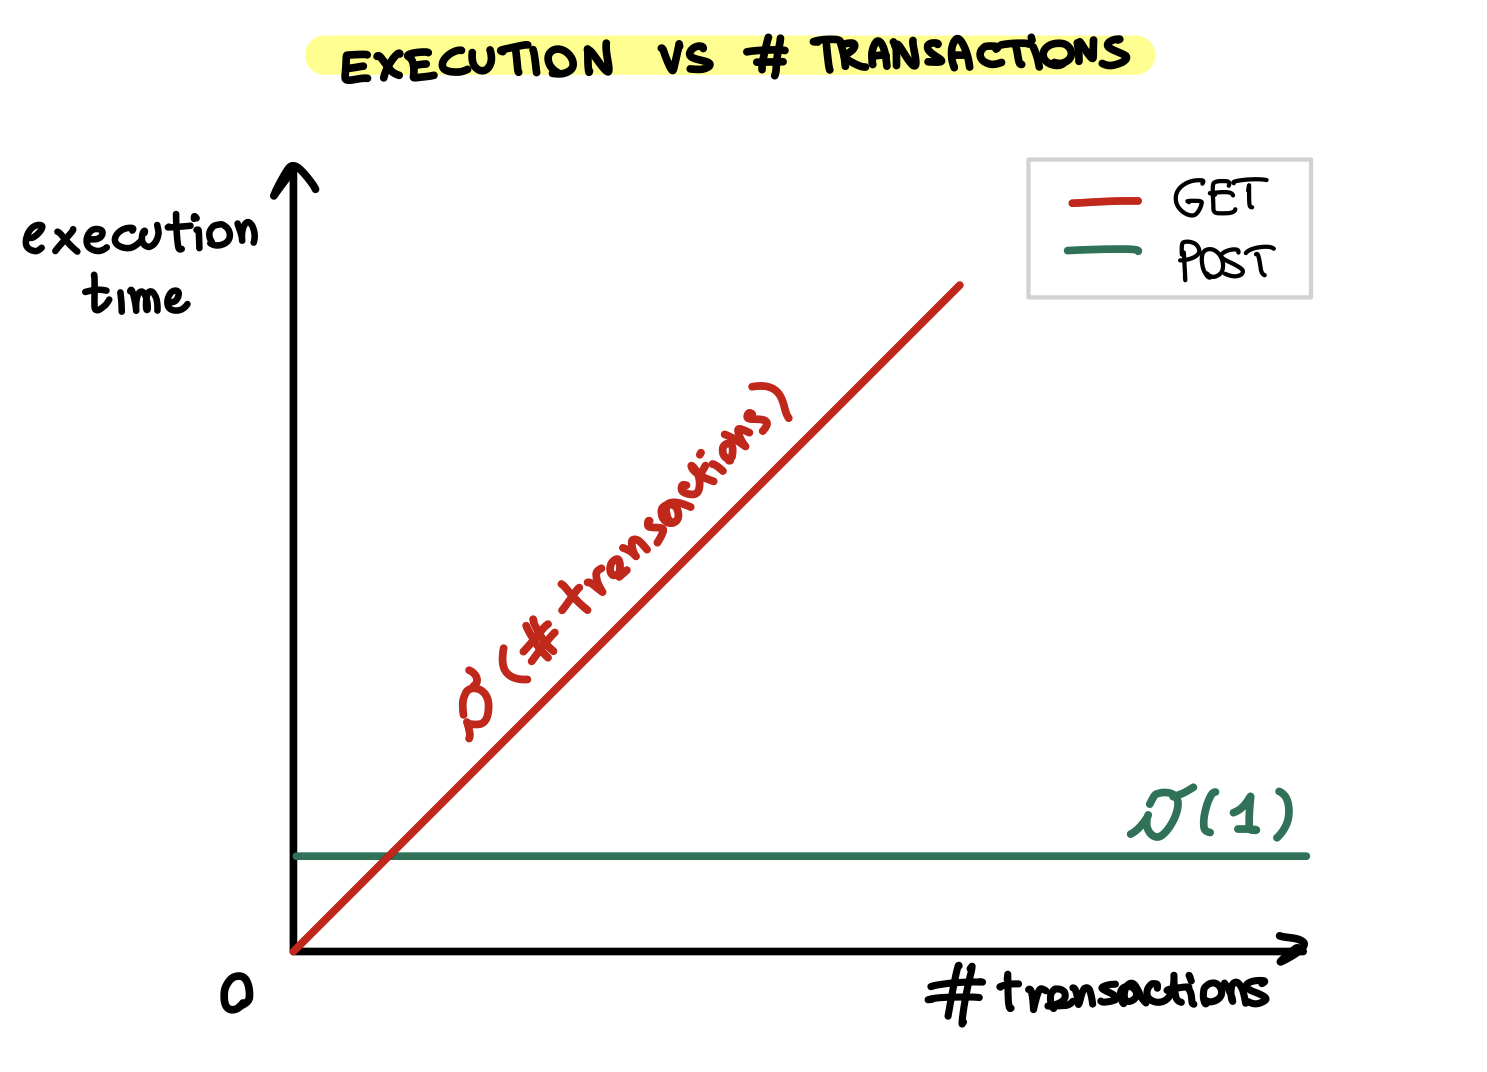

In [3]:
from IPython.display import Image
Image(filename='graph.png',width=400, height=400)

### 4.2.4
Q: If the Crypto server goes down, the way it is implemented it loses the current account balances. How can the server recompute the account balances after a restart from the saved Block Chain?

A: If the account balances are suddenly lost, the server can perform a sweep over all the blocks in the chain and recompute all the transactions. A possible algorithm could be one that, during a sweep over the whole chain, defines a new balance variable accounting for each new *team* found, and for each transaction it adds *coin* to the *team* subtracting them from the *debit*. I could also exploit this operation to check if all the subsequent blocks are paired correctly with the *index* and *hash* variables (see answer to question 4.2.2).


## 4.2.5
Q: What are the advantages of using a REST API and JSON in a client-server architecture? What are possible disadvantages? 

A:
**Advantages**: I found REST API quite easy to understand and to implement, so this is certainly one advantage. Then, only REST implements standards such as JSON and many other, allowing a faster handling and making the API portable and flexible. In fact, JSON syntax is easy to use and well known, it has a more compact style with respect to XML and it is more readable: JSON uses in fact a map data structure rather than a tree as in XML. With such a schema we can get more predictable and easier data models.  Moreover, JSON is the right choice on the server side because it allows a fast data parsing. Finally, REST does not need much bandwidth when requests are sent to the server and this differs from other APIs such as SOAP, which requires more bandwidth. 


**Disadvantages**: The first one is that REST API is stateless and most web applications require stateful mechanisms. As I have seen and discussed in 4.2.4 if the Crypto sever goes down, the account balances are completely lost. So, in this case, the state maintenance should be client-side, and this could result in an application heavy and difficult to maintain.
The second main disadvantage, is that there exist more secure APIs: REST is suitable for public URLs and not for private exchange of private and confidential material (for which is better to use other APIs such as SOAP). 